# Basic Measurement For Quantum Features

In [1]:
from qiskit import QuantumCircuit, assemble, Aer
from qiskit.visualization import plot_histogram
import numpy as np

## State Initialization

#### Requests:
    1. The length should be 2^(input bits)
    2. The sum of absolute values of each bit should equal to 1.

#### Physical Significance
    Each element in the initialization vector represents the wave function of each state

#### Further Design Pattern
    * Create a initialization vector first
    * Only take qubit argument

## Single Bit Circuit

In [2]:
# single bit initialization

cir_sigbit = QuantumCircuit(1)
cir_sigbit.initialize([np.cos(np.pi/4), -1j*np.sin(np.pi/4)], cir_sigbit.qubits)
"""
The .initialization method takes (qubit, cbit)
Assign cbit to qubit
"""
cir_sigbit.measure_all()
cir_sigbit.draw()

┌───────────────────────────────┐ ░ ┌─┐
     q: ┤ Initialize(0.70711,-0.70711j) ├─░─┤M├
        └───────────────────────────────┘ ░ └╥┘
meas: 1/═════════════════════════════════════╩═
                                             0

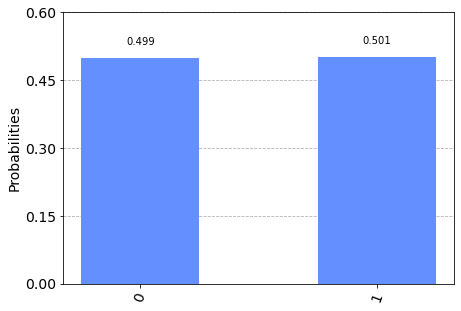

In [3]:
sim = Aer.get_backend('aer_simulator') 
result = sim.run(cir_sigbit).result()
counts = result.get_counts()
plot_histogram(counts)

## 2-bit Q-Circuit

In [4]:
circuit2 = QuantumCircuit(2)
circuit2.initialize([0, 1/2, np.sqrt(3)/2, 0], circuit2.qubits)
circuit2.measure_all()
circuit2.draw(initial_state=True)

┌──────────────────────────────┐ ░ ┌─┐   
  q_0: |0>┤0                             ├─░─┤M├───
          │  Initialize(0,0.5,0.86603,0) │ ░ └╥┘┌─┐
  q_1: |0>┤1                             ├─░──╫─┤M├
          └──────────────────────────────┘ ░  ║ └╥┘
meas: 0 2/════════════════════════════════════╩══╩═
                                              0  1

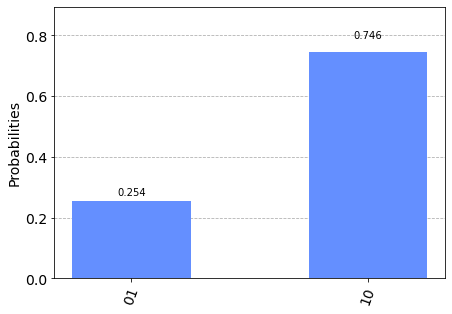

In [5]:
sim = Aer.get_backend('aer_simulator') 
result = sim.run(circuit2).result()
counts = result.get_counts()
plot_histogram(counts)

## 2-bit Q-Circuit with equal probability

In [6]:
circuit4 = QuantumCircuit(2)
circuit4.initialize([0.5, 0.5, 0.5, 0.5], circuit4.qubits)
'''
P(oo)=P(01)=P(10)=P(11)
'''
circuit4.measure_all()
circuit4.draw(initial_state=True)

┌──────────────────────────────┐ ░ ┌─┐   
  q_0: |0>┤0                             ├─░─┤M├───
          │  Initialize(0.5,0.5,0.5,0.5) │ ░ └╥┘┌─┐
  q_1: |0>┤1                             ├─░──╫─┤M├
          └──────────────────────────────┘ ░  ║ └╥┘
meas: 0 2/════════════════════════════════════╩══╩═
                                              0  1

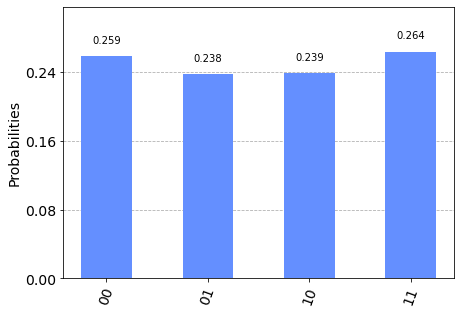

In [7]:
sim = Aer.get_backend('aer_simulator') 
result = sim.run(circuit4).result()
counts = result.get_counts()
plot_histogram(counts)